<a target="_blank" href="https://colab.research.google.com/github/evaalonsoortiz/ELE8812-demos/blob/main/Demos/Lesson%204/Le%C3%A7on_4_Demo_reh.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# ELE8812 - Traitement fréquentiel

## Démo : Rehaussement par masquage flou

### Référence : DIP 4e édition, Chapitre 4, p.291

Dans ce démo, les contours d’une image seront rehaussés en utilisant la technique du masquage flou (*unsharp masking*). Pour ce faire, l’image est d’abord filtrée avec un filtre passe-bas (dans cet exemple un filtre gaussien est utilisé). L’image filtrée passe-bas est ensuite soustraite à l’image originale, afin de conserver uniquement le contenu à haute fréquence de l’image originale. Le résultat est multiplié par le facteur de rehaussement (> 0) puis additionné à l’image originale pour obtenir l’image aux contours rehaussés.

À noter que le même traitement peut être fait en utilisant directement un filtre passe-haut (voir les équations à la page 292 du manuel DIP 4e édition).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.io

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Option d'affichage
plt.rcParams['figure.figsize'] = (16,10)
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
!git clone https://github.com/evaalonsoortiz/ELE8812-demos.git Repo

Cloning into 'Repo'...
remote: Enumerating objects: 371, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 371 (delta 0), reused 0 (delta 0), pack-reused 362
Receiving objects: 100% (371/371), 37.46 MiB | 12.01 MiB/s, done.
Resolving deltas: 100% (129/129), done.


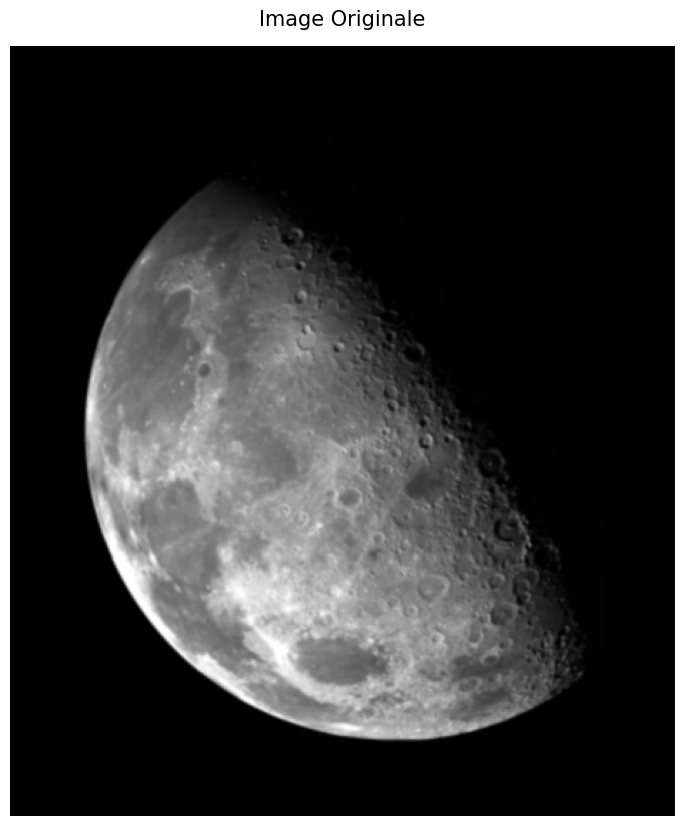

In [3]:
# Charger image
A = np.double(plt.imread('Repo/Data/Lune.tif'));
plt.imshow(A, cmap='gray'); plt.title('Image Originale'); plt.axis('off'); plt.show();

In [4]:
def filtpb_gauss(A, fc, pad):
    """ Application d'un filtre gaussien sur une image im à une fréquence de coupure fc dans
        le domaine fréquentiel

    A (ndarray): Image d'entrée
    fc (float): Fréquence de coupure
    pad (int): Nombre de pixels de padding
    """
    M,N = A.shape
    M+=pad
    N+=pad

    # Image dans le domaine fréquentiel
    AA = np.fft.fftshift(np.fft.fft2(A, (M,N)))

    M0 = np.ceil((M+1) / 2)
    N0 = np.ceil((N+1) / 2)

    U, V = np.mgrid[1:M+1, 1:N+1]
    D2 = (U - M0)**2 + (V - N0)**2

    # Réponse fréquentielle du filtre gaussien
    HH = np.exp(-D2 / (2 * fc**2))

    # Application du filtre et retour au domaine spatial
    BB = np.fft.ifftshift(AA * HH)
    B = np.fft.ifft2(BB)
    B = np.real(B)
    return B[:A.shape[0],:A.shape[1]]

## Fréquence de coupure

La diminution de la fréquence de coupure du filtre gaussien passe-bas entraîne l’apparition de plus en plus de « relief » dans la différence entre l’image originale et l’image filtrée. Ainsi, les contours apparaissent plus rehaussés dans l’image finale.

In [5]:
fc_slider = widgets.IntSlider(min=1, max=200, step=1, description='fc:', readout=True,)
display(fc_slider)

IntSlider(value=1, description='fc:', max=200, min=1)

## Facteur de rehaussement

Pour une fréquence de coupure fixe, plus le facteur de rehaussement augmente, plus les contours auront du poids dans l’image finale. Par exemple, pour un facteur de rehaussement de 1, la différence entre l’image filtrée passe-bas et l’image originale (contenu à haute fréquence) est ajoutée telle quelle à l’image originale pour obtenir le résultat final. Pour un facteur de 2, l’intensité du contenu à haute fréquence est doublée avant d’être additionné à l’image originale.

In [6]:
reh_slider = widgets.FloatSlider(min=0, max=20, step=1, description='alpha:', readout=True,)
display(reh_slider)

FloatSlider(value=0.0, description='alpha:', max=20.0, step=1.0)

## Rehaussement par masquage flou

L’image avec les contours rehaussés (droite) est obtenue en additionnant l’image de gauche et l’image du centre (multipliée par le facteur de rehaussement). Le rehaussement de l’image fait ressortir d’avantage les cratères de la lune.

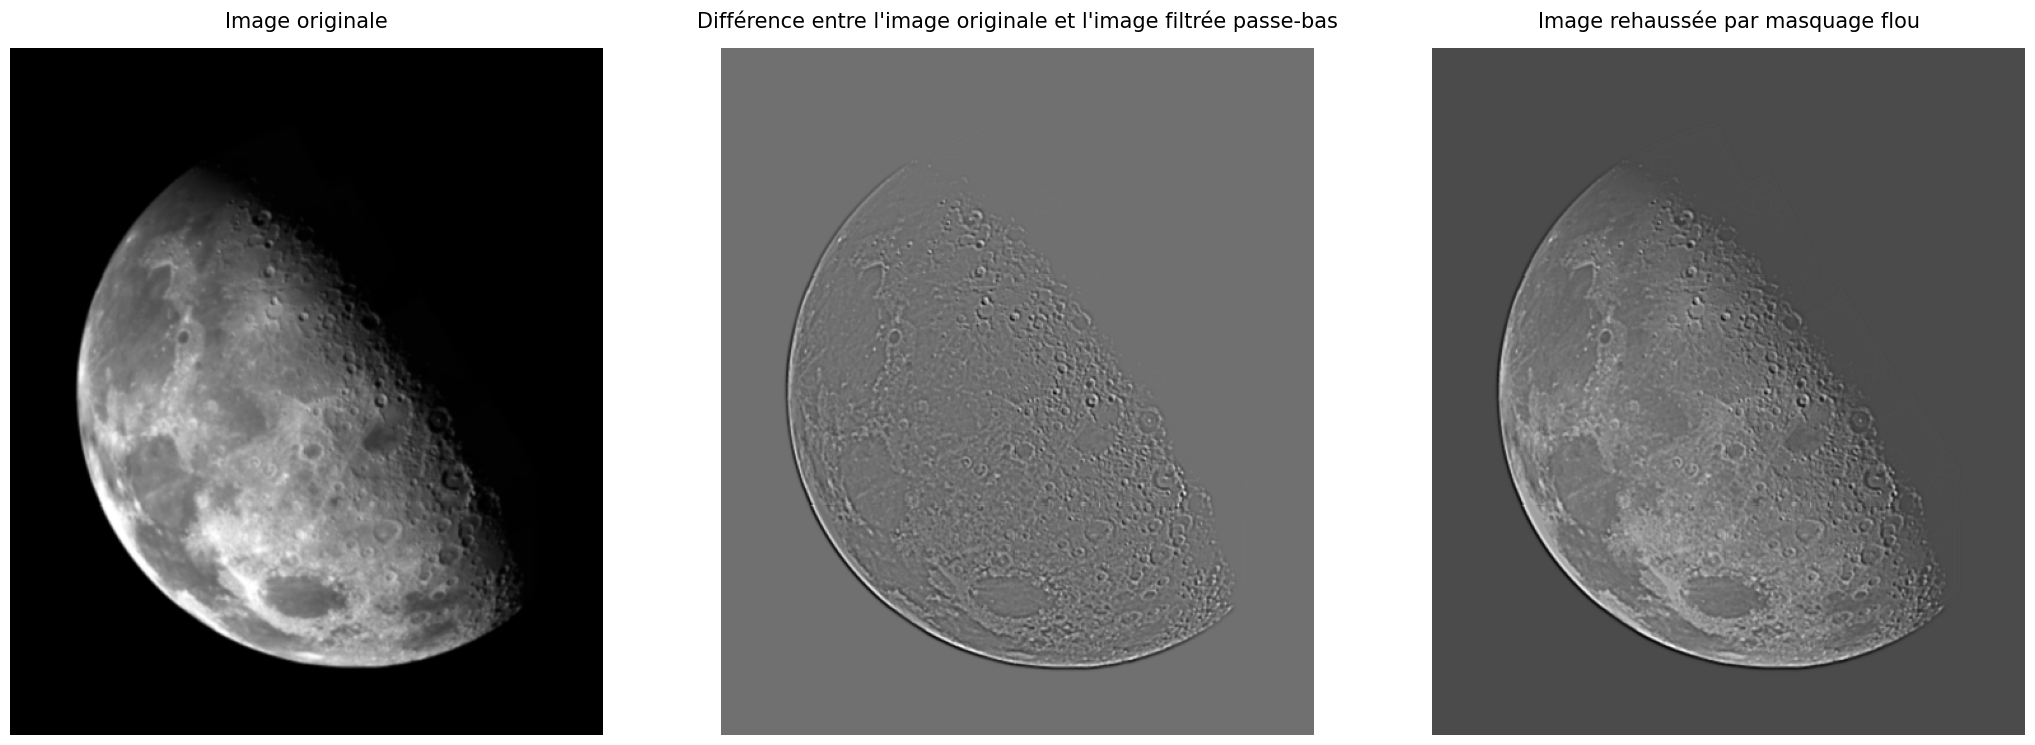

In [8]:
figure(figsize=(26, 26))

fc=fc_slider.value
alpha=reh_slider.value

B=A+alpha*(A-filtpb_gauss(A,fc,pad=0))

plt.subplot(131); plt.imshow(A, cmap='gray'); plt.title('Image originale'); plt.axis('off');
plt.subplot(132); plt.imshow(A-filtpb_gauss(A,fc,pad=0), cmap='gray'); plt.title('Différence entre l\'image originale et l\'image filtrée passe-bas'); plt.axis('off');
plt.subplot(133); plt.imshow(B, cmap='gray'); plt.title('Image rehaussée par masquage flou'); plt.axis('off'); plt.show();